# 파이썬을 활용한 모평균에 대한 가설검정

## 두 집단의 평균 비교 : 쌍체표본 T-검정 (Paired T-test)

- (예) 새로운 시스템 도입 후 20개 지역의 연간 민원 접수 건수 비교 

In [1]:
before = [130, 133, 132, 138, 140, 128, 140, 132, 126, 130, 125, 140]
after = [120, 130, 121, 107, 132, 125, 141, 133, 118, 133, 111, 131]

In [2]:
import pandas as pd
dat = pd.DataFrame({'before' : before, 'after' : after})

In [3]:
dat.mean()

before    132.833333
after     125.166667
dtype: float64

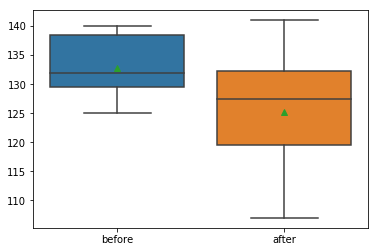

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=dat, showmeans=True)
plt.show()

- (예) 새로운 시스템 도입 후 20개 지역의 연간 민원 접수 건수에 **차이가 나는지**를 검정 
    - 실제로는 지역에 관한 정보로 전/후 관측치가 연결되어 있고 관심은 **전/후 값의 차이**이므로 단일 표본의 평균 검정과 동일함 : paired t-test 고려 
    - (양측검정) $H_0$ : $\mu_{before} =\mu_{after}$ vs. $H_1$ : $\mu_{before} \neq \mu_{after}$ 

In [6]:
# paired T-test 시행
from scipy import stats

result = stats.ttest_rel(dat.before, dat.after) # (default) 양측검정
result

#statistic : 검정 통계량(T값) / pvalue  두 값을 보여줌.

Ttest_relResult(statistic=2.9188637754073192, pvalue=0.013965838615562465)

In [7]:
print("검정통계량= %.3f , p-value = %.3f" % result)

# (참고) 다른 출력 방식 
t, p = result
print('양측검정 p-value : %.4f' % p)

검정통계량= 2.919 , p-value = 0.014
양측검정 p-value : 0.0140


- (양측 검정)
    - 결과 : p-value(=0.014) < $\alpha$ (0.05). 따라서 $H_0$ 기각
    - 해석 : before와 after의 평균이 **통계적으로 유의(statistically significant)**하게 **다르다**고 할 수 있다. 

- (예) 새로운 시스템 도입 후 20개 지역의 연간 민원 접수 건수가 감소했는지를 검정 
    - (단측검정) $H_0$ : $\mu_{before} =\mu_{after}$, $H_1$ : $\mu_{before} > \mu_{after}$ 

In [8]:
p2 = p/2
print('단측검정 p-value : %.4f' % p2)

단측검정 p-value : 0.0070


- (단측 검정) 
    - 결과 : p-value(=0.014/2) < $\alpha$ (0.05). 따라서 $H_0$ 기각
    - 해석 : after의 평균이 before의 평균보다 **통계적으로 유의**하게 **작다**고 할 수 있다. 

## 두 집단의 평균 비교 : 독립표본 T-검정 (Two independent sample T-test)

- 서로 독립인 두 집단에서 관심 변수의 평균을 비교
    - (예) 음식값을 지불하는 사람의 성별(sex)에 따라 팁(tip)의 평균 비교

In [9]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [11]:
tips.groupby('sex').tip.mean() 

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

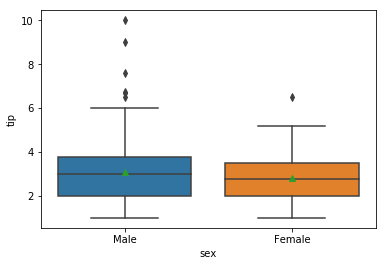

In [12]:
sns.boxplot(x="sex", y="tip", data=tips, showmeans=True)
plt.show()

In [13]:
# sex 에 따라 데이터셋 분리 
dat_M = tips.loc[tips.sex == 'Male', ['tip', 'sex']]
dat_F = tips.loc[tips.sex == 'Female', ['tip', 'sex']]

- (양측검정인 경우) $H_0$ : $\mu_m =\mu_f$, $H_1$ : $\mu_m \neq \mu_f$  
- (단측검정인 경우) $H_0$ : $\mu_m =\mu_f$, $H_1$ : $\mu_m > \mu_f$ 

- 검정절차 : 
    - [step 1] : 두 집단의 **모분산**이 동일한지에 관한 검정
    - [step 2] : **모평균**에 대한 **T-test** 시행 : 분산이 동일한지 아닌지 여부에 따라 ttest 함수의 옵션이 달라짐

In [14]:
# [step 1] 두 집단의 모분산이 동일한가를 검정하는 bartlett test

s, p = stats.bartlett(dat_M.tip, dat_F.tip)
print('p-value : %.4f' % p)

p-value : 0.0106


- (등분산성 검정) $H_0$ : 등분산 / $H_1$ : 등분산 아님 
    - 결과 : p-value(=0.0106) < $\alpha$ (0.05). 따라서 $H_0$ 기각
    - 해석 : $H_0$ 기각되므로 분산이 다르다고 할 수 있다. 

In [16]:
# [step 2] T-test 
result = stats.ttest_ind(dat_M.tip, dat_F.tip, equal_var=False)
 
print("등분산을 가정하지 않고(equal_var=False) t-test의 검정통계량과 p-value는 %.3f and %.3f." % result)

등분산을 가정하지 않고(equal_var=False) t-test의 검정통계량과 p-value는 1.490 and 0.138.


- **(양측 검정)**
    - 결과 : p-value(=0.138) > $\alpha$ (0.05). 따라서 $H_0$ 기각할 수 없음 
    - 해석 : $H_0$ 기각할 수 없으므로 성별에 다른 tip의 평균은 통계적으로 유의(statistically significant)한 **차이가 없다**고 할 수 있다. 

- **(단측 검정)**
    - 결과 : p-value(=0.138/2) > $\alpha$ (0.05). 따라서 $H_0$ 기각할 수 없음 
    - 해석 : $H_0$ 기각되므로 남성이 지불한 tip의 평균이 여성이 지불한 tip의 평균보다 통계적으로 유의(statistically significant)하게 **크다고 할 수 없다**. 